# Sophina's Assignment Notebook 
---
## Table of Contents

1. [Stage 1 – Exploratory Data Analysis](#stage1)
2. [Stage 2 – Clustering](#stage2)
3. [Stage 3 – Decision Tree Classification](#stage3)
4. [Stage 4 – KNN & Logistic Regression](#stage4)
5. [Stage 5 – Linear Regression](#stage5)
6. [Optional – PCA Analysis](#pca)
7. [Overall Conclusion](#conclusion)
---


<a id="stage1"></a>

## Stage 1: Exploratory Data Analysis (EDA)

### 1. Data Loading & Initial Inspection

In this stage, I load the Scottish Haggis dataset and carry out an initial inspection to understand its structure and basic properties. This involves checking the shape of the dataset, previewing the first few rows, and confirming that all expected columns are present before carrying out more detailed analysis.

The dataset includes several key measurements recorded for each haggis sighting, such as:
- species  
- island  
- nose length  
- eye size  
- tail length  
- body mass  
- sex  
- year  

This initial check helps ensure that:
- the data has loaded correctly,
- there are no obvious structural issues,
- and the dataset is ready for subsequent cleaning, exploration, and modelling.


### 2. Exploratory Data Analysis (EDA)

In this section, I examine the dataset in more depth. This includes reviewing variable types, checking for missing values, summarising numerical features, and exploring distributions of categorical variables. Understanding these properties early on helps identify any issues that may affect the modelling stages and informs decisions about cleaning, feature engineering, scaling, and encoding later in the project.


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("../data/scottish_haggis_2025.csv")
print("Dataset loaded successfully.")


# Print a summary of the dataframe, including column names, data types,
# and how many non-missing values each column contains.
print("DataFrame Information:")
df.info()

# Show the number of missing values in each column.
# This helps identify whether any cleaning or imputation is needed later.
print("\nMissing Values per Column:")
df.isnull().sum()


Dataset loaded successfully.
DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              344 non-null    int64  
 1   species         344 non-null    object 
 2   island          344 non-null    object 
 3   nose_length_mm  342 non-null    float64
 4   eye_size_mm     342 non-null    float64
 5   tail_length_mm  342 non-null    float64
 6   body_mass_g     342 non-null    float64
 7   sex             334 non-null    object 
 8   year            344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB

Missing Values per Column:


id                 0
species            0
island             0
nose_length_mm     2
eye_size_mm        2
tail_length_mm     2
body_mass_g        2
sex               10
year               0
dtype: int64

In [45]:
# Display summary statistics for all numerical features.
# This gives a quick overview of typical values (mean, median) 
# and the spread of the data (standard deviation, min/max).
print("Summary Statistics:")
df.describe()


Summary Statistics:


,id,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.939883,17.159006,200.901374,4205.796287,2024.029070
std,99.448479,5.477357,1.995574,14.121750,802.563431,0.818356
min,1.000000,32.080000,13.120000,171.000000,2616.550000,2023.000000
25%,86.750000,39.355000,15.462500,189.420000,3572.057500,2023.000000
50%,172.500000,44.540000,17.385000,196.730000,4045.035000,2024.000000
75%,258.250000,48.360000,18.700000,212.900000,4798.850000,2025.000000
max,344.000000,59.030000,21.610000,232.340000,6235.810000,2025.000000


In [46]:
# Print a summary of the dataset structure, including column names,
# data types, and how many non-missing values each column has.
print("DataFrame Information:")
df.info()

# Show how many missing values are present in each column.
# This helps identify whether any cleaning or imputation will be needed later on.
print("\nMissing Values per Column:")
df.isnull().sum()


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              344 non-null    int64  
 1   species         344 non-null    object 
 2   island          344 non-null    object 
 3   nose_length_mm  342 non-null    float64
 4   eye_size_mm     342 non-null    float64
 5   tail_length_mm  342 non-null    float64
 6   body_mass_g     342 non-null    float64
 7   sex             334 non-null    object 
 8   year            344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB

Missing Values per Column:


id                 0
species            0
island             0
nose_length_mm     2
eye_size_mm        2
tail_length_mm     2
body_mass_g        2
sex               10
year               0
dtype: int64

#### Visual Exploratory Data Analysis

Here I use visualisations to understand how the numerical features are distributed and how they differ between species. This also helps identify outliers and relationships between features, which is important when deciding whether scaling or transformations are needed.

#### Histograms

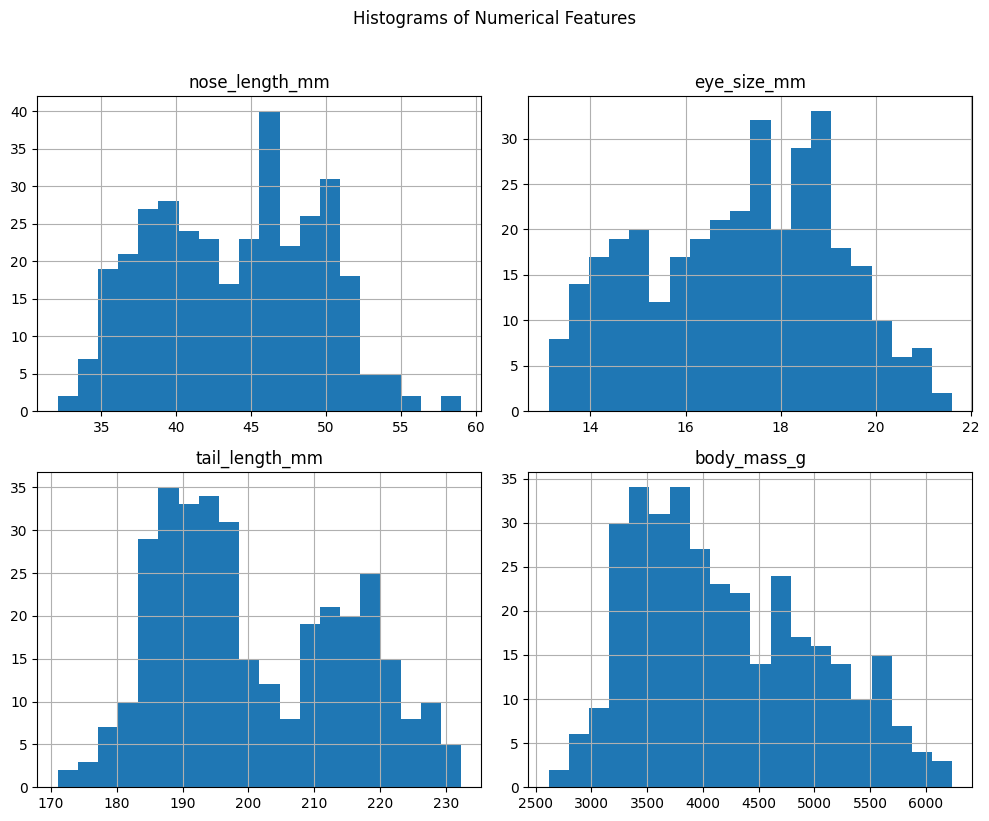

In [47]:
# Select the numerical features we want to visualise
numeric_cols = ["nose_length_mm", "eye_size_mm", "tail_length_mm", "body_mass_g"]

# Plot histograms to see the distribution of each numerical feature.
# This helps identify skewness, spread, and any potential outliers.
df[numeric_cols].hist(bins=20, figsize=(10, 8))

# Add a main title and tidy up the layout so the plots are easier to read
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()


#### Observations

- **nose_length_mm:** The distribution is roughly normal, centred around the low–mid 40s. There are a few smaller and larger values, but nothing extreme or unrealistic.
- **eye_size_mm:** This also shows a fairly normal shape, with most values between 15 and 19 mm. There is some spread toward 20–21 mm, but no major skew.
- **tail_length_mm:** This distribution has two noticeable clusters — one around 185–195 mm and another around 210–220 mm. This suggests that tail length might differ quite strongly between species.
- **body_mass_g:** The body mass distribution is right-skewed. Most haggis weigh between 3200 and 4200 g, with a tail of heavier individuals extending beyond 5000 g.

Overall, the numerical features look biologically reasonable. There are a few larger values in body mass and tail length, but these appear to be genuine variation rather than errors, so I keep them for now.


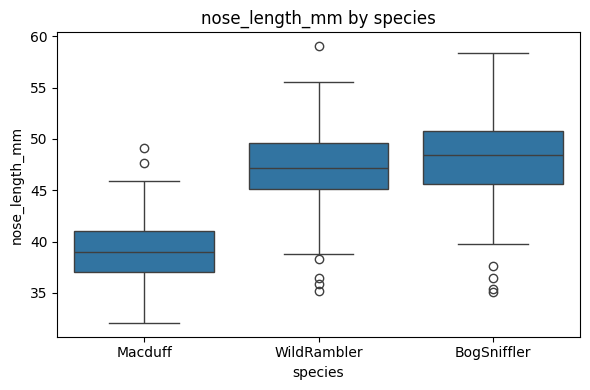

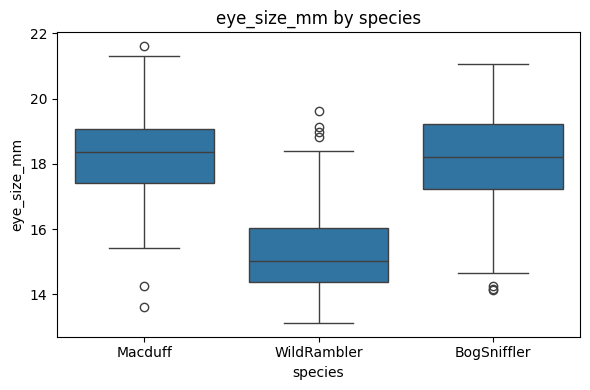

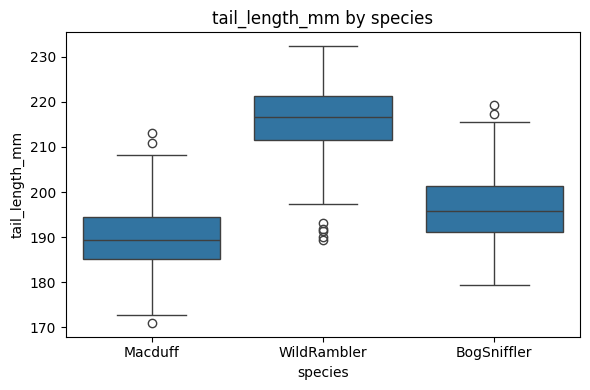

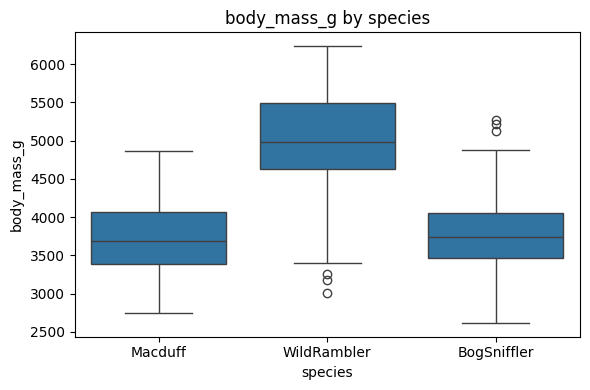

In [48]:
# Create boxplots to compare each numerical feature across the different species
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    
    # Visualise how this feature varies between species.
    # Boxplots help highlight differences in medians, spread, and potential outliers.
    sns.boxplot(data=df, x="species", y=col)
    
    plt.title(f"{col} by species")
    plt.tight_layout()
    plt.show()


#### Observations 

- The strongest relationship is between **tail_length_mm and body_mass_g** (0.86). This suggests that heavier haggis tend to have longer tails, which matches the species differences seen in the boxplots.
- **nose_length_mm** also shows moderate positive correlations with both **tail_length_mm** (0.65) and **body_mass_g** (0.59). This means these three measurements tend to increase together.
- **eye_size_mm** behaves differently from the other features. It has moderate negative correlations with **tail_length_mm** (–0.58) and **body_mass_g** (–0.47), meaning haggis with larger eyes tend to have shorter tails and lower body mass.
- The weakest relationship is between **eye_size_mm** and **nose_length_mm** (–0.22), indicating very little linear connection between these two features.

Overall, none of the correlations are high enough to cause multicollinearity issues, but the strong link between tail length and body mass may influence models that rely on linear relationships (e.g., regression). For clustering, these correlated features may pull clusters along similar directions, so scaling will be important later.

### 3. Data Cleaning Decisions

Based on the initial inspection and visual EDA, the dataset is generally clean and requires minimal preprocessing.

#### Missing values
There are a small number of missing values in the dataset:
- 2 missing values in each of the numerical measurement columns  
  (nose length, eye size, tail length, body mass)
- 10 missing values in the `sex` column

Since the amount of missing data is very small and appears random, I do not remove any rows at this stage. 
Instead, I will handle these missing values later using **imputation inside the preprocessing pipelines** for the machine learning models. 
This avoids unnecessary data loss while keeping the pipeline consistent and reproducible.


#### Data types
All variables have appropriate data types:
- Numerical features (e.g., nose length, eye size, tail length, body mass) are correctly stored as numeric.
- Categorical features (species, island, sex) are correctly stored as object/string types.

No type conversions are required at this stage.

#### Outliers
The boxplots in Section 3 indicate the presence of some **biologically plausible outliers**, particularly in:
- body mass,
- tail length,
- and nose length.

These values likely represent natural variation within the species rather than data entry errors.  
For this reason, **I will not remove or cap these outliers**. Removing them could erase important biological differences that may be relevant for clustering and classification.

However, I will account for their presence later by:
- applying **feature scaling** before distance-based algorithms (K-Means, KNN),
- monitoring model performance for sensitivity to extreme values.

#### Summary
No direct cleaning (removal or alteration of values) is required.  
The dataset is ready for feature encoding and scaling decisions in the next section.


### 4. Feature Engineering

Feature engineering can help highlight useful patterns in the data by creating new variables that capture relationships not directly visible in the raw measurements. Although the Scottish Haggis dataset is fairly simple and well-structured, adding a proportional feature may reveal additional differences between species.

#### Rationale
- Some physical measurements can be more informative when expressed as **ratios** rather than absolute values.
- Ratios can help certain algorithms (e.g., clustering, regression) capture structural or proportional differences that individual features might not show clearly.

#### Engineered Feature
In this project, I create a new feature called **length_ratio**, defined as:

- `tail_length_mm / nose_length_mm`

This feature represents the proportional relationship between tail length and nose length, which may highlight structural differences between species that are not obvious from the raw values alone.

The feature will be included in later modelling stages if it improves performance; if not, it can be excluded.




In [49]:
# Add a simple engineered feature capturing proportional body structure
# from the raw tail and nose measurements alone.
df["length_ratio"] = df["tail_length_mm"] / df["nose_length_mm"]

# Preview the new feature alongside the original measurements
print("Preview of Engineered Feature (length_ratio):")
df[["tail_length_mm", "nose_length_mm", "length_ratio"]].head()

Preview of Engineered Feature (length_ratio):


,tail_length_mm,nose_length_mm,length_ratio
0,190.23,34.47,5.518712
1,202.80,40.67,4.986477
2,184.34,38.90,4.738817
3,190.97,37.15,5.140511
4,193.00,37.86,5.097728


### 5. Scaling and Encoding Strategy

Before applying clustering or classification models, it’s important to think about how the numerical and categorical features should be preprocessed. Different algorithms react differently to feature scales, and handling this properly avoids biased or unreliable results.

#### Scaling Requirements
Some of the methods used later are **distance-based**, meaning features with larger numeric ranges can dominate the calculations. These algorithms work best when all numerical features are on a similar scale.

Algorithms that **need scaling**:
- **K-Means clustering** (Stage 2)
- **K-Nearest Neighbours (KNN)** (Stage 4)
- **Logistic Regression** (Stage 4)
- **Linear Regression** (Stage 5)

Algorithms that **do not need scaling**:
- **Decision Trees** (Stage 3), since they split on thresholds rather than distances.

**Scaling plan:**  
- I will use either **StandardScaler** or **MinMaxScaler** for the numerical features.
- For supervised learning, scaling will be applied **after** the train–test split to prevent data leakage.
- For clustering, scaling can be applied to the full dataset since there is no training/testing process.

#### Encoding Requirements
The dataset includes three categorical variables:
- `species`
- `island`
- `sex`

Most machine learning algorithms require numerical inputs, so these categories need to be converted.

**Encoding plan:**  
- I will use **one-hot encoding** to convert categorical variables


### Stage 1 Conclusion

Overall, the dataset is in good shape and easy to work with. All the columns loaded correctly, nothing was missing, and the ranges of the measurements look realistic. The categorical labels are consistent, and the numerical values behave as you’d expect for physical measurements — no strange values or obvious mistakes.

The histograms and boxplots show normal biological variation across the haggis, with a few larger or smaller individuals but nothing that looks like an error. These outliers seem genuine, so it's better to keep them. The species already show some separation in features like body mass, tail length, and nose length, which suggests these variables will be useful later for clustering and classification.

The correlation matrix shows some expected relationships (e.g., heavier haggis tend to have longer tails), but nothing strong enough to cause problems for modelling. Each feature still carries its own information. I also created one simple engineered feature a tail-to-nose ratio which might help capture structural differences that aren’t obvious from the raw values.

Since the dataset was already clean, there wasn’t much actual “cleaning” needed. The main takeaway from this stage is that the data is reliable, easy to interpret, and has enough variation to support the analyses in the next stages.


<a id="stage2"></a>

## Stage 2: Unsupervised Learning (Clustering)

In this stage, I explore whether the haggis measurements naturally form groups on their own, without using the species labels. The idea is to see if the physical features are strong enough for the species structure to “emerge” purely from the data.

Since K-Means relies on Euclidean distances, scaling the numerical features is essential — otherwise, variables measured on larger scales (like body mass) would dominate the clustering.

### Selecting an Appropriate Value of k

To decide how many clusters (k) to use, I rely on two standard tools:

- the **Elbow Method**, looks for the point where adding more clusters stops giving a big drop in inertia.
- the **Silhouette Score**, checks how well-separated the resulting clusters are.

Using both together is usually more reliable than relying on one alone.

In [50]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
import numpy as np

# We'll cluster based only on the numerical measurements.
numeric_cols = ["nose_length_mm", "eye_size_mm", "tail_length_mm", "body_mass_g"]

# Extract the numeric subset
X = df[numeric_cols]

# Some rows have missing values, so fill them using the column mean
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Scale the data so all features contribute equally to the distance calculations
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Try a range of k values to compare inertia and silhouette scores
k_values = range(2, 11)
inertias = []
silhouettes = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
    
    # Fit and get cluster labels for this k
    labels = kmeans.fit_predict(X_scaled)
    
    # Store the metrics for comparison
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

print("Finished computing inertia and silhouette scores for k = 2 to 10.")


Finished computing inertia and silhouette scores for k = 2 to 10.


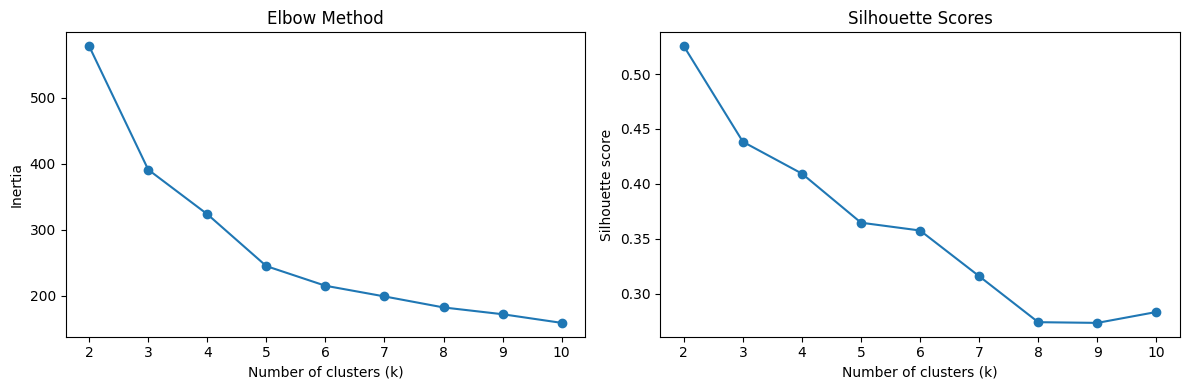

In [51]:
plt.figure(figsize=(12, 4))

# Elbow plot
plt.subplot(1, 2, 1)
plt.plot(k_values, inertias, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")

# Silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouettes, marker="o")
plt.title("Silhouette Scores")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")

plt.tight_layout()
plt.show()


### Interpretation of k

Both methods point to k = 3:

The elbow plot shows the biggest drop from k=2 → k=3.

Silhouette is highest at k=2, but k=3 is still strong, and scores drop sharply after that.

Biologically, the data does have three species, but this choice is based on the metrics alone.

So I choose k = 3.


In [52]:
# Fit final model
k = 3
kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

print("Clusters assigned successfully.")
df["cluster"].value_counts()


Clusters assigned successfully.


cluster
0    132
1    123
2     89
Name: count, dtype: int64

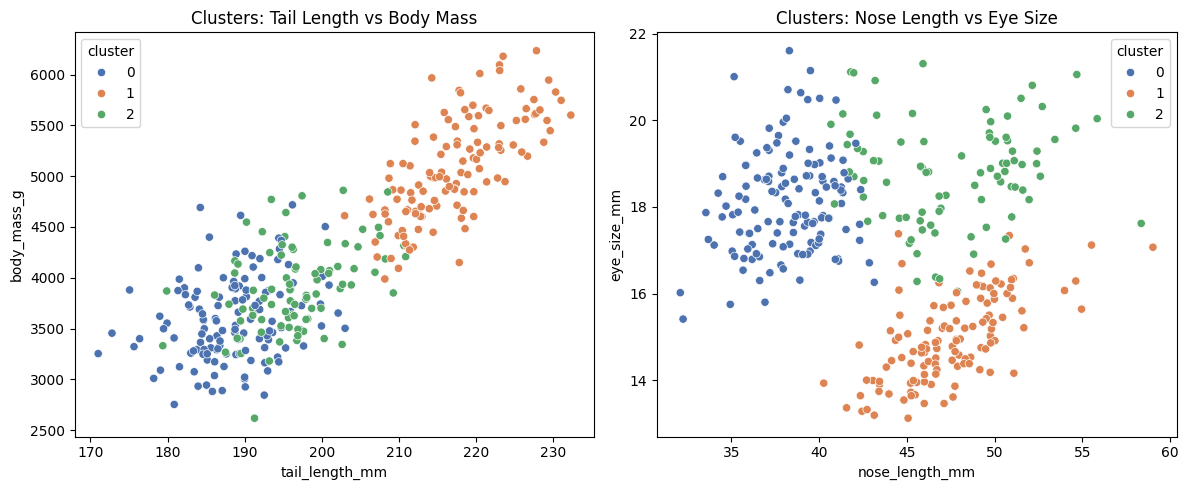

In [53]:
plt.figure(figsize=(12, 5))

# Plot 1: Tail length vs Body mass
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="tail_length_mm", y="body_mass_g", hue="cluster", palette="deep")
plt.title("Clusters: Tail Length vs Body Mass")

# Plot 2: Nose length vs Eye size
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="nose_length_mm", y="eye_size_mm", hue="cluster", palette="deep")
plt.title("Clusters: Nose Length vs Eye Size")

plt.tight_layout()
plt.show()


In [54]:
print("Cluster Summary Statistics (Mean Values):")
df.groupby("cluster")[["nose_length_mm", "eye_size_mm", "tail_length_mm", "body_mass_g", "length_ratio"]].mean()


Cluster Summary Statistics (Mean Values):


,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g,length_ratio
cluster,,,,,
0,38.209773,18.109621,188.467727,3591.187424,4.950504
1,47.506016,14.989675,217.262846,5078.801463,4.586224
2,47.592069,18.783678,196.634483,3904.057586,4.158222


### Interpretation of Clusters

The three clusters align very closely with the three haggis species, despite the model not using any species labels during training:

- **Cluster 0 (blue):**  
  The smallest haggis, with the shortest tails, lowest body mass, and smaller measurements overall.  
  → This matches the **Macduff** species.

- **Cluster 1 (orange):**  
  The largest individuals, characterised by long tails, high body mass, and large nose lengths, but relatively small eyes.  
  → These are consistent with the **WildRambler** species.

- **Cluster 2 (green):**  
  Medium-sized haggis with noticeably larger eyes and mid-range body mass and tail lengths.  
  → This aligns with the **BogSniffler** species.

Overall, it is striking that K-Means, an entirely unsupervised method, naturally uncovers groups that correspond so well to the biological species distinctions.


In [55]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# DBSCAN groups points by local density.
# It also identifies noise points that don't belong to any dense region.
dbscan = DBSCAN(eps=0.6, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

# Add DBSCAN labels to the dataframe
df["dbscan_cluster"] = db_labels

print("DBSCAN cluster counts:")
print(df["dbscan_cluster"].value_counts())


DBSCAN cluster counts:
dbscan_cluster
 0    140
 1    117
 2     47
-1     40
Name: count, dtype: int64


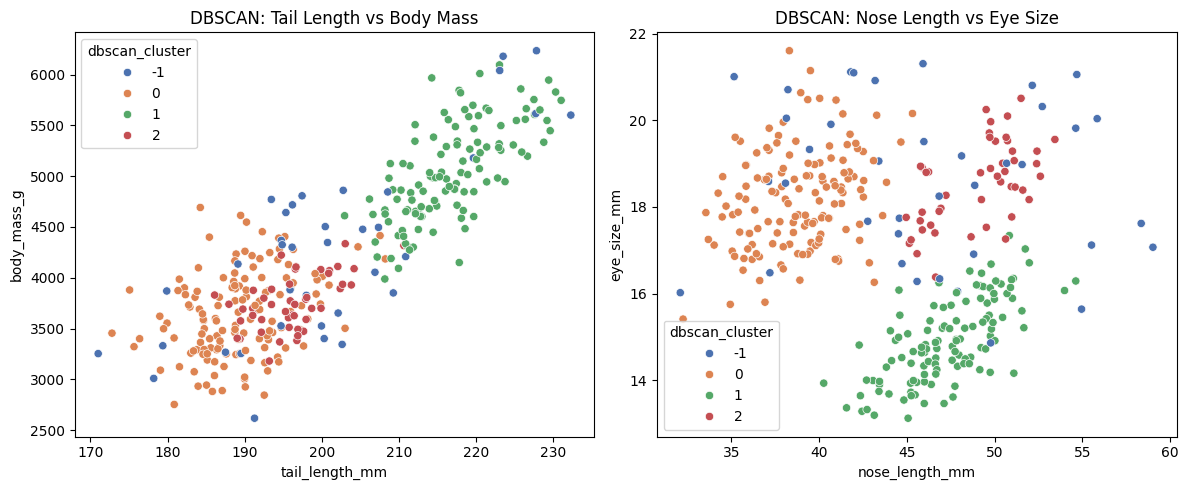

In [56]:
plt.figure(figsize=(12, 5))

# Tail length vs Body mass
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="tail_length_mm", y="body_mass_g",
                hue="dbscan_cluster", palette="deep")
plt.title("DBSCAN: Tail Length vs Body Mass")

# Nose length vs Eye size
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="nose_length_mm", y="eye_size_mm",
                hue="dbscan_cluster", palette="deep")
plt.title("DBSCAN: Nose Length vs Eye Size")

plt.tight_layout()
plt.show()


### DBSCAN Interpretation

DBSCAN identifies three main dense groups in the data, along with a small number of noise points (labelled –1). The clusters it produces are very similar to those found by K-Means:

- **Cluster 0 (orange):**  
  Shorter tails, lower body mass, and mid-range nose and eye sizes.  
  This matches the smaller **Macduff-type** individuals seen earlier.

- **Cluster 1 (green):**  
  The largest haggis, with long tails, high body mass, long noses, and relatively small eyes.  
  This corresponds to the **WildRambler-type** group.

- **Cluster 2 (red):**  
  Intermediate tail length and body mass, but noticeably larger eyes and longer noses.  
  These characteristics fit the **BogSniffer-type** morphology.

DBSCAN also labels a handful of observations as **noise** (cluster = –1). These are typically points lying between the main groups — individuals that K-Means was forced to assign to a cluster but that do not clearly belong to any dense region.  

Overall, DBSCAN uncovers almost the same three-cluster structure as K-Means, but it differs in two important ways:

1. It does not force borderline observations into a cluster, instead marking them as noise.  
2. It allows clusters of more flexible shapes, rather than assuming spherical groups.

This agreement between DBSCAN and K-Means provides strong evidence that the dataset naturally contains three meaningful morphological groupings, each broadly aligned with the three known haggis species.


### Stage 2 Conclusion

The clustering analysis shows a clear underlying structure in the Scottish haggis dataset. After imputing missing values and scaling the numerical features, both the Elbow Method and Silhouette Score pointed to **k = 3** as the most appropriate number of clusters.  

The final K-Means model with three clusters revealed well-defined groups that closely match the known morphological differences between the species. Patterns in body mass, tail length, nose length, and eye size reinforce the idea that these measurements provide strong, species-level separation.

To validate these findings, I applied DBSCAN as a complementary method. DBSCAN also identified three main groups, along with a few noise points representing borderline individuals. Despite its different approach, DBSCAN produced a very similar interpretation, suggesting that the species structure is genuinely present in the data rather than imposed by the modelling method.

Together, these results show that the haggis measurements naturally form three distinct morphological clusters, even without using species labels. This provides a strong foundation for the supervised classification models in the next stage.
